In [1]:
from stockanalysis.data import *
from stockanalysis.encoder import *

from stockanalysis.utils import *


from stockanalysis.param import *


2022-03-09 21:24:15.234425: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 21:24:15.234450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [3]:
ticker = "AAPL"




#Get Data


start_date = (datetime.datetime.now() - datetime.timedelta(days=5 * 365)).strftime("%Y-%m-%d")
end_date = datetime.datetime.now().strftime("%Y-%m-%d")
cleaned_data = get_technical(symbol=ticker, start=start_date,
                                 end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
start_date, end_date



('2017-03-10', '2022-03-09')

In [5]:
cleaned_data.columns





Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ema12', 'ema21',
       'ema26', 'ema34', 'ema55', 'ema99', 'ema200', 'hma12', 'hma21', 'hma26',
       'hma34', 'hma55', 'hma99', 'hma200', 'rsi', 'atr', 'bb_upper',
       'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap'],
      dtype='object')

In [6]:
indicadores = ['Volume','rsi', 'atr', 'bb_upper', 'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap']




In [7]:
cleaned_data




,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,hma99,hma200,rsi,atr,bb_upper,bb_lower,macd_signal,macd_line,adx,vwap
0,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,44.141370,43.495085,59.340580,0.530549,44.256818,42.394182,0.226262,0.190909,14.458721,43.771667
1,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,44.151781,43.544877,63.933112,0.529796,44.395146,42.376353,0.279048,0.208537,15.490660,44.174999
2,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,44.164261,43.596540,60.286755,0.549989,44.472069,42.398681,0.299277,0.226685,17.043627,44.310000
3,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,44.186655,43.652845,66.866883,0.585347,44.689691,42.309309,0.369749,0.255298,17.874635,44.451668
4,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,44.217663,43.713296,67.188768,0.576572,44.832803,42.237196,0.423939,0.289026,18.904211,44.800833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800,166.182844,167.436760,167.855506,168.176060,...,171.113381,176.327515,47.775912,4.679898,178.259195,159.932806,-1.672662,-1.201970,22.659371,165.623332
1042,2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400,166.190098,167.327054,167.735098,168.064856,...,170.555555,176.302385,47.265043,4.585620,177.309586,159.921415,-1.544999,-1.270576,22.629427,166.896667
1043,2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200,165.725467,166.949140,167.396942,167.785150,...,170.000539,176.256623,42.705000,4.553075,176.898249,159.359753,-1.671475,-1.350756,23.208600,163.606669
1044,2022-03-07,163.360001,165.020004,159.039993,159.300003,96213500,164.736934,166.253764,166.797169,167.300284,...,169.408208,176.176627,37.745196,4.654999,176.809663,158.139339,-2.060234,-1.492652,24.214012,161.120000


In [8]:
cleaned_data.iloc[0]['Close'], cleaned_data.iloc[-1]['Close'] 




(43.81999969482422, 157.44000244140625)

In [9]:
cleaned_data.iloc[-1]['Close']  / cleaned_data.iloc[0]['Close']


3.5928800442233277

In [10]:
cleaned_data['Close'].pct_change().cumsum()






0            NaN
1       0.010326
2       0.005244
3       0.021760
4       0.022654
          ...   
1041    1.559387
1042    1.557405
1043    1.538997
1044    1.515280
1045    1.503604
Name: Close, Length: 1046, dtype: float64

In [11]:
cleaned_data.set_index('Date', inplace = True)




In [12]:
cleaned_data.reset_index().info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1046 non-null   datetime64[ns]
 1   Open         1046 non-null   float64       
 2   High         1046 non-null   float64       
 3   Low          1046 non-null   float64       
 4   Close        1046 non-null   float64       
 5   Volume       1046 non-null   int64         
 6   ema12        1046 non-null   float64       
 7   ema21        1046 non-null   float64       
 8   ema26        1046 non-null   float64       
 9   ema34        1046 non-null   float64       
 10  ema55        1046 non-null   float64       
 11  ema99        1046 non-null   float64       
 12  ema200       1046 non-null   float64       
 13  hma12        1046 non-null   float64       
 14  hma21        1046 non-null   float64       
 15  hma26        1046 non-null   float64       
 16  hma34 

# Feature Engen


## Sharp Ratio


In [13]:
#https://www.investopedia.com/terms/t/treynorratio.asp
#https://www.investopedia.com/terms/s/sortinoratio.asp
#https://www.investopedia.com/terms/s/sharperatio.asp

In [14]:
cleaned_data['returns'] = cleaned_data['Close'].pct_change()

cleaned_data['sharp_ratio'] = cleaned_data['returns'].mean() / cleaned_data['returns'].std()


<AxesSubplot:>

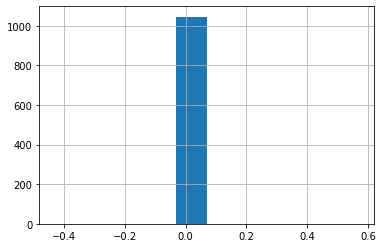

In [15]:
cleaned_data['sharp_ratio'].hist()




In [16]:
cleaned_data['week'] = cleaned_data.reset_index()['Date'].dt.week.to_list()

cleaned_data['month'] = cleaned_data.reset_index()['Date'].dt.month.to_list()
cleaned_data['year'] = cleaned_data.reset_index()['Date'].dt.year.to_list()


/tmp/ipykernel_26859/1009644727.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  cleaned_data['week'] = cleaned_data.reset_index()['Date'].dt.week.to_list()


In [17]:
temp_cleaned_df = cleaned_data.copy()
temp_cleaned_df.reset_index(inplace = True)
temp_cleaned_df.head()



,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,bb_lower,macd_signal,macd_line,adx,vwap,returns,sharp_ratio,week,month,year
0,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,42.394182,0.226262,0.190909,14.458721,43.771667,NaN,0.06952,2,1,2018
1,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,42.376353,0.279048,0.208537,15.490660,44.174999,0.010326,0.06952,2,1,2018
2,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,42.398681,0.299277,0.226685,17.043627,44.310000,-0.005082,0.06952,3,1,2018
3,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,42.309309,0.369749,0.255298,17.874635,44.451668,0.016516,0.06952,3,1,2018
4,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,42.237196,0.423939,0.289026,18.904211,44.800833,0.000893,0.06952,3,1,2018


In [18]:
temp_cleaned_df.shape


(1046, 33)

## Anual


In [19]:
anual_df = temp_cleaned_df.groupby(['year'])[['returns']].agg(['mean', 'std'])
anual_df = anual_df['returns'].reset_index()


anual_df['sharp_ratio_annual'] = anual_df['mean'] / anual_df['std']

anual_df['sortino_anual'] = anual_df['mean'] / anual_df[anual_df['mean'] < 0]['mean'].std()



anual_df = anual_df.rename(columns = {'mean':'man_annual', 'std':'sd_annual'})


anual_df = anual_df.dropna()



# anual_df.dropna(inplace = True)




anual_df









,year,man_annual,sd_annual,sharp_ratio_annual,sortino_anual
0,2018,-0.000266,0.018346,-0.014500,-0.167788
1,2019,0.002606,0.016492,0.157995,1.643548
2,2020,0.002773,0.029392,0.094345,1.749076
3,2021,0.001281,0.015815,0.081020,0.808213
4,2022,-0.002508,0.018339,-0.136766,-1.582002


In [20]:
merged_df = temp_cleaned_df.merge(anual_df, on = 'year')


In [21]:
print(merged_df.shape)



(1046, 37)


In [22]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,vwap,returns,sharp_ratio,week,month,year,man_annual,sd_annual,sharp_ratio_annual,sortino_anual
0,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,43.771667,NaN,0.06952,2,1,2018,-0.000266,0.018346,-0.0145,-0.167788
1,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,44.174999,0.010326,0.06952,2,1,2018,-0.000266,0.018346,-0.0145,-0.167788
2,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,44.310000,-0.005082,0.06952,3,1,2018,-0.000266,0.018346,-0.0145,-0.167788
3,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,44.451668,0.016516,0.06952,3,1,2018,-0.000266,0.018346,-0.0145,-0.167788
4,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,44.800833,0.000893,0.06952,3,1,2018,-0.000266,0.018346,-0.0145,-0.167788


## Month 


In [23]:
month_df = cleaned_data.groupby(['year', 'month'])[['returns']].agg(['mean', 'std'])
month_df = month_df['returns'].reset_index()

month_df['sharp_ratio_month'] = month_df['mean'] / month_df['std']
month_df['sortino_month'] = month_df['mean'] / month_df[month_df['mean'] < 0]['mean'].std()



month_df = month_df.rename(columns = {'mean':'mean_month', 'std':'std_month'})

month_df = month_df.dropna()


# month_df.dropna(inplace = True)


month_df





,year,month,mean_month,std_month,sharp_ratio_month,sortino_month
0,2018,1,-0.003465,0.010745,-0.322466,-1.299158
1,2018,2,0.003508,0.022748,0.154201,1.315194
2,2018,3,-0.002713,0.016677,-0.162654,-1.017061
3,2018,4,-0.000595,0.016128,-0.036903,-0.223159
4,2018,5,0.005692,0.013922,0.408883,2.134334
5,2018,6,-0.000414,0.008709,-0.047581,-0.155376
6,2018,7,0.001360,0.009658,0.140776,0.509762
7,2018,8,0.007915,0.014264,0.554924,2.967817
8,2018,9,-0.000341,0.014354,-0.023779,-0.127982
9,2018,10,-0.001141,0.020610,-0.055340,-0.427640


In [24]:
merged_df = merged_df.merge(month_df, on = ['year', 'month'])





In [25]:
print(merged_df.shape)


(1046, 41)


In [26]:
merged_df.head()



,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,month,year,man_annual,sd_annual,sharp_ratio_annual,sortino_anual,mean_month,std_month,sharp_ratio_month,sortino_month
0,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,1,2018,-0.000266,0.018346,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158
1,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,1,2018,-0.000266,0.018346,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158
2,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,1,2018,-0.000266,0.018346,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158
3,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,1,2018,-0.000266,0.018346,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158
4,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,1,2018,-0.000266,0.018346,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158


## Week


In [27]:
week_df = cleaned_data.groupby(['year', 'month', 'week'])[['returns']].agg(['mean', 'std'])



week_df = week_df['returns'].reset_index()
#sharp_ratio
week_df['sharp_ratio_week'] = week_df['mean'] / week_df['std']

#Sortino
week_df['sortino_week'] = week_df['mean'] / week_df[week_df['mean'] < 0]['mean'].std()

week_df = week_df.rename(columns = {'mean':'mean_week', 'std':'std_week'})

week_df = week_df.dropna()


# week_df.dropna(inplace = True)



week_df







,year,month,week,mean_week,std_week,sharp_ratio_week,sortino_week
1,2018,1,3,0.001966,0.010064,0.195363,0.276174
2,2018,1,4,-0.007879,0.009143,-0.861773,-1.106759
3,2018,1,5,-0.007946,0.011861,-0.669948,-1.116101
4,2018,2,5,-0.020650,0.032160,-0.642104,-2.900518
5,2018,2,6,-0.004799,0.029736,-0.161386,-0.674081
...,...,...,...,...,...,...,...
239,2022,2,6,-0.004258,0.018047,-0.235956,-0.598125
240,2022,2,7,-0.001488,0.016347,-0.091007,-0.208957
241,2022,2,8,-0.003508,0.021474,-0.163349,-0.492698
243,2022,3,9,-0.002857,0.017022,-0.167861,-0.401340


In [28]:
week_df[week_df['mean_week'] < 0]['mean_week'].std()






0.007096877031420107

In [29]:
merged_df = merged_df.merge(week_df, on = ['year', 'month', 'week'])




In [30]:
print(merged_df.shape)
merged_df.head()



(1030, 45)


,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,sharp_ratio_annual,sortino_anual,mean_month,std_month,sharp_ratio_month,sortino_month,mean_week,std_week,sharp_ratio_week,sortino_week
0,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
1,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
3,2018-01-19,44.652500,44.895000,44.352501,44.615002,129700400,44.052036,43.741365,43.606425,43.399591,...,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
4,2018-01-22,44.325001,44.445000,44.150002,44.250000,108434400,44.082492,43.787605,43.654097,43.448186,...,-0.0145,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,-0.007879,0.009143,-0.861773,-1.106759


## Trend and Seasonal


# Feature Selection


In [31]:
indicadores = merged_df.columns.to_list()[16:]
indicadores


['hma34',
 'hma55',
 'hma99',
 'hma200',
 'rsi',
 'atr',
 'bb_upper',
 'bb_lower',
 'macd_signal',
 'macd_line',
 'adx',
 'vwap',
 'returns',
 'sharp_ratio',
 'week',
 'month',
 'year',
 'man_annual',
 'sd_annual',
 'sharp_ratio_annual',
 'sortino_anual',
 'mean_month',
 'std_month',
 'sharp_ratio_month',
 'sortino_month',
 'mean_week',
 'std_week',
 'sharp_ratio_week',
 'sortino_week']

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# vif(merged_df.dropna().values, 0)



In [33]:
vif(merged_df[indicadores].dropna().values, 0)





4257.966398536419

In [34]:
df = pd.DataFrame()
temp_df = merged_df[indicadores].copy()


df["features"] = temp_df.columns

df["vif_index"] = [vif(temp_df.dropna().values, i) for i in range(temp_df.shape[1])]


vif_df = round(df.sort_values(by="vif_index", ascending = False),2)



/home/thierry/.pyenv/versions/3.8.12/envs/stockanalysis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
vif_df



,features,vif_index
28,sortino_week,inf
25,mean_week,inf
24,sortino_month,inf
21,mean_month,inf
20,sortino_anual,inf
17,man_annual,inf
13,sharp_ratio,1.383940e+08
1,hma55,1.656305e+04
6,bb_upper,8.083720e+03
7,bb_lower,6.420720e+03


In [36]:
merged_df.corr()['Close'].sort_values()




Volume               -0.261916
sharp_ratio_annual   -0.150513
man_annual           -0.113581
sortino_anual        -0.113581
adx                  -0.108510
std_month            -0.055312
sharp_ratio_month    -0.053732
std_week             -0.027349
mean_month            0.003665
sortino_month         0.003665
sortino_week          0.006221
mean_week             0.006221
sd_annual             0.012177
returns               0.019153
sharp_ratio_week      0.030509
rsi                   0.043985
week                  0.105927
month                 0.115992
macd_signal           0.330382
macd_line             0.361077
atr                   0.800761
year                  0.912833
ema200                0.980917
hma200                0.984594
ema99                 0.987222
hma99                 0.990939
ema55                 0.991336
bb_lower              0.992253
bb_upper              0.993790
ema34                 0.994085
hma55                 0.995090
ema26                 0.995364
ema21   

In [37]:
merged_df_no_nas = merged_df.dropna()
X = merged_df_no_nas[indicadores]

y = merged_df_no_nas['Close']


model = sm.OLS(y,X).fit()
model.summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.317e+05
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:24:20   Log-Likelihood:                -555.91
No. Observations:                1030   AIC:                             1164.
Df Residuals:                    1004   BIC:                             1292.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
hma34                 -0.0139      0.020     -0.703      0.482      -0.053       0.025
hma55                  0.0603      0.039      1.548      0.122      -0.016       0.137
hma99                  0.0126      0.008      1.624      0.105      -0.003       0.028
hma200                -0.0104      0.010     -1.016      0.310      -0.031       0.010
rsi                    0.0053      0.002      2.152      0.032       0.000       0.010
atr                   -0.0471      0.041     -1.161      0.246      -0.127       0.032
bb_upper               0.0794      0.026      3.025      0.003       0.028       0.131
bb_lower               0.0693      0.026      2.660      0.008       0.018       0.120
macd_signal            1.2060      0.119     10.159      0.000       0.973       1.439
macd_line             -1.0937      0.149     -7.336      0.000      -1.386      -0.801
adx                   -0.0012      0.002     -0.683      0.495      -0.005       0.002
vwap                   0.8055      0.018     45.304      0.000       0.771       0.840
returns               22.6412      0.812     27.898      0.000      21.049      24.234
sharp_ratio         1758.3173   2216.856      0.793      0.428   -2591.885    6108.520
week                  -0.0019      0.005     -0.359      0.720      -0.012       0.009
month                  0.0086      0.024      0.363      0.717      -0.038       0.055
year                  -0.0603      0.077     -0.786      0.432      -0.211       0.090
man_annual             0.0016      0.001      1.265      0.206      -0.001       0.004
sd_annual            -55.2315     49.813     -1.109      0.268    -152.980      42.517
sharp_ratio_annual   -10.8267      9.026     -1.200      0.231     -28.538       6.884
sortino_anual          0.9889      0.782      1.265      0.206      -0.545       2.523
mean_month            -0.0001   8.11e-05     -1.486      0.138      -0.000    3.86e-05
std_month             -0.2716      2.795     -0.097      0.923      -5.756       5.213
sharp_ratio_month      0.1215      0.204      0.595      0.552      -0.279       0.522
sortino_month         -0.0452      0.030     -1.486      0.138      -0.105       0.014
mean_week              0.0001   9.68e-05      1.290      0.197   -6.51e-05       0.000
std_week               2.7321      1.693      1.613      0.107      -0.591       6.055
sharp_ratio_week      -0.0021      0.005     -0.435      0.664      -0.012       0.007
sortino_week           0.0175      0.014      1.290      0.197      -0.009       0.044
==============================================================================
Omnibus:                      128.785   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              796.098
Skew:                           0.375   Prob(JB):             

In [82]:
X


,hma34,hma55,hma99,hma200,rsi,atr,bb_upper,bb_lower,macd_signal,macd_line,...,sharp_ratio_annual,sortino_anual,mean_month,std_month,sharp_ratio_month,sortino_month,mean_week,std_week,sharp_ratio_week,sortino_week
0,43.567057,43.477045,44.164261,43.596540,60.286755,0.549989,44.472069,42.398681,0.299277,0.226685,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
1,43.706740,43.571178,44.186655,43.652845,66.866883,0.585347,44.689691,42.309309,0.369749,0.255298,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2,43.879089,43.683075,44.217663,43.713296,67.188768,0.576572,44.832803,42.237196,0.423939,0.289026,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
3,44.057527,43.801025,44.253353,43.776431,63.848590,0.574138,44.964569,42.203431,0.445611,0.320343,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
4,44.213001,43.910143,44.288717,43.840244,58.165379,0.566343,45.027902,42.206348,0.428394,0.341953,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,-0.007879,0.009143,-0.861773,-1.106759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,165.577513,166.894010,171.113381,176.327515,47.775912,4.679898,178.259195,159.932806,-1.672662,-1.201970,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
1026,165.001289,166.664177,170.555555,176.302385,47.265043,4.585620,177.309586,159.921415,-1.544999,-1.270576,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
1027,164.395903,166.403260,170.000539,176.256623,42.705000,4.553075,176.898249,159.359753,-1.671475,-1.350756,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
1028,163.581125,165.986722,169.408208,176.176627,37.745196,4.654999,176.809663,158.139339,-2.060234,-1.492652,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.017697,0.008515,-2.078407,-2.485732


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

y = merged_df_no_nas['Close']


model = sm.OLS(y,X_scaled).fit()

model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.299e+05
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        21:47:13   Log-Likelihood:                         -1541.6
No. Observations:                1030   AIC:                                      3133.
Df Residuals:                    1005   BIC:                                      3257.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
hma34                -97.6000      6.674    -14.624      0.000    -110.697     -84.503
hma55                -79.5230     14.574     -5.457      0.000    -108.122     -50.924
hma99                  9.9829      2.943      3.392      0.001       4.208      15.758
hma200                34.6910      3.471      9.996      0.000      27.881      41.501
rsi                   -0.9764      0.406     -2.402      0.016      -1.774      -0.179
atr                   -1.7067      0.530     -3.222      0.001      -2.746      -0.667
bb_upper             113.2852      9.275     12.214      0.000      95.085     131.485
bb_lower             108.0197      8.479     12.739      0.000      91.380     124.659
macd_signal           52.7424      3.530     14.941      0.000      45.815      59.670
macd_line            -10.5736      4.151     -2.547      0.011     -18.720      -2.427
adx                    0.4692      0.227      2.066      0.039       0.024       0.915
vwap                  43.1283      6.221      6.933      0.000      30.921      55.335
returns               10.7538      0.495     21.741      0.000       9.783      11.724
sharp_ratio         1.406e-13   1.35e-14     10.440      0.000    1.14e-13    1.67e-13
week                   2.0629      0.718      2.873      0.004       0.654       3.472
month                 -1.6547      0.677     -2.444      0.015      -2.983      -0.326
year                   2.3133      0.793      2.916      0.004       0.756       3.870
man_annual            -9.7111      3.366     -2.885      0.004     -16.316      -3.106
sd_annual              3.5396      1.754      2.018      0.044       0.098       6.981
sharp_ratio_annual    19.3558      6.880      2.813      0.005       5.854      32.858
sortino_anual         -9.7111      3.366     -2.885      0.004     -16.316      -3.106
mean_month             0.7234      0.276      2.617      0.009       0.181       1.266
std_month              1.6109      0.406      3.969      0.000       0.815       2.407
sharp_ratio_month     -1.0628      0.557     -1.907      0.057      -2.157       0.031
sortino_month          0.7234      0.276      2.617      0.009       0.181       1.266
mean_week             -0.2299      0.165     -1.396      0.163      -0.553       0.093
std_week              -0.5953      0.419     -1.419      0.156      -1.418       0.228
sharp_ratio_week      17.9931      0.627     28.705      0.000      16.763      19.223
sortino_week          -0.2299      0.165     -1.396      0.163      -0.553       0.093
==============================================================================
Omnibus:                     1227.607   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Ja

In [39]:
merged_df.describe()[indicadores]




,hma34,hma55,hma99,hma200,rsi,atr,bb_upper,bb_lower,macd_signal,macd_line,...,sharp_ratio_annual,sortino_anual,mean_month,std_month,sharp_ratio_month,sortino_month,mean_week,std_week,sharp_ratio_week,sortino_week
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,...,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,87.878167,87.853477,87.799840,87.222772,56.574633,2.160238,92.250235,81.452975,0.845710,0.853328,...,0.071532,0.911451,0.001436,0.018567,0.115789,0.538488,0.001265,0.017268,0.021476,0.177663
std,43.188170,43.266616,43.354564,42.881648,12.763037,1.272951,44.886811,40.300058,1.894120,1.769953,...,0.074043,0.912450,0.004195,0.009435,0.243308,1.572995,0.009115,0.012279,2.889459,1.280358
min,36.595011,36.011641,35.040693,38.353310,21.024929,0.549989,40.199229,35.358491,-4.665018,-3.805254,...,-0.136766,-1.582002,-0.009264,0.008709,-0.496478,-3.473459,-0.036061,0.000340,-62.914638,-5.065184
25%,49.445143,49.148654,48.991909,48.748639,47.674329,1.034621,51.789671,46.089297,-0.165115,-0.139907,...,-0.014500,-0.167788,-0.001261,0.013211,-0.055340,-0.472988,-0.002999,0.009230,-0.216411,-0.421195
50%,70.565364,69.825289,69.719060,72.636732,57.746849,1.759079,75.897076,64.516023,0.819533,0.757080,...,0.081020,0.808213,0.002661,0.015665,0.163069,0.997634,0.001254,0.014100,0.085788,0.176180
75%,126.909262,127.447001,127.795513,129.801407,65.540494,3.062602,134.451318,118.962592,1.774779,1.831208,...,0.094345,1.643548,0.004512,0.022748,0.311151,1.691783,0.006013,0.021928,0.423954,0.844622
max,180.767441,182.702985,181.159815,176.342406,85.417001,5.595927,185.173126,169.905249,7.511570,6.895524,...,0.157995,1.749076,0.009482,0.065027,0.554924,3.555262,0.030345,0.095746,6.827455,4.262273


# Plot Analysis


In [40]:
def indicators_plot(cleaned_data, indicators, figsize = (15,25) ):
    '''
        Function used to make historical analysis of the indicators of a given stock
        has the dependency on matplotlib and seaborn libraries
        
        cleaned_data needs to be a dataframe containing a datetime index
        
        Indicators needs to be a list like the one below
        indicators = ['Volume','rsi', 'atr', 'bb_upper',
        'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap']
    '''
    
    fig = plt.figure(figsize= figsize)
    count = 0
    for column in indicators:
        print(column)
        
        
        mean = cleaned_data[column].mean()
        
        std = cleaned_data[column].std()
        
        two_above_std = mean + 2 * std
        two_below_std =  mean - 2 * std
        
        count +=1
        #Indicator Graph
        axs = fig.add_subplot(len(indicators),2,count)
        
        axs.plot(cleaned_data['Close'].pct_change().cumsum() * 100)
        for element in cleaned_data[cleaned_data[column]> two_above_std].reset_index().to_numpy(): 


            axs.axvline(element[0], color = 'green')

        for element in cleaned_data[cleaned_data[column]< two_below_std].reset_index().to_numpy(): 


            axs.axvline(element[0], color = 'red')

        axs.plot(cleaned_data[column], color = 'orange', label = column)
        
        plt.grid()
        
        plt.legend()
        #Distribution of the indicator
        count +=1
        axs = fig.add_subplot(len(indicators),2,count)
        axs = sns.kdeplot(cleaned_data[column])
        axs.axvline(mean, color = 'orange')
        
        axs.axvline(two_below_std, color = 'red')
        axs.axvline(two_above_std, color = 'green')
        axs.axvline(cleaned_data.iloc[-1][column], color = 'blue')
        
        
        
        

In [41]:
cleaned_data.iloc[-1]['rsi']




35.60485789943146

In [42]:
indicadores = ['rsi', 'atr', 'bb_upper', 'bb_lower',
               
       'macd_signal', 'macd_line', 'adx', 'vwap', 'returns']



rsi
atr
bb_upper
bb_lower
macd_signal
macd_line
adx
vwap
returns


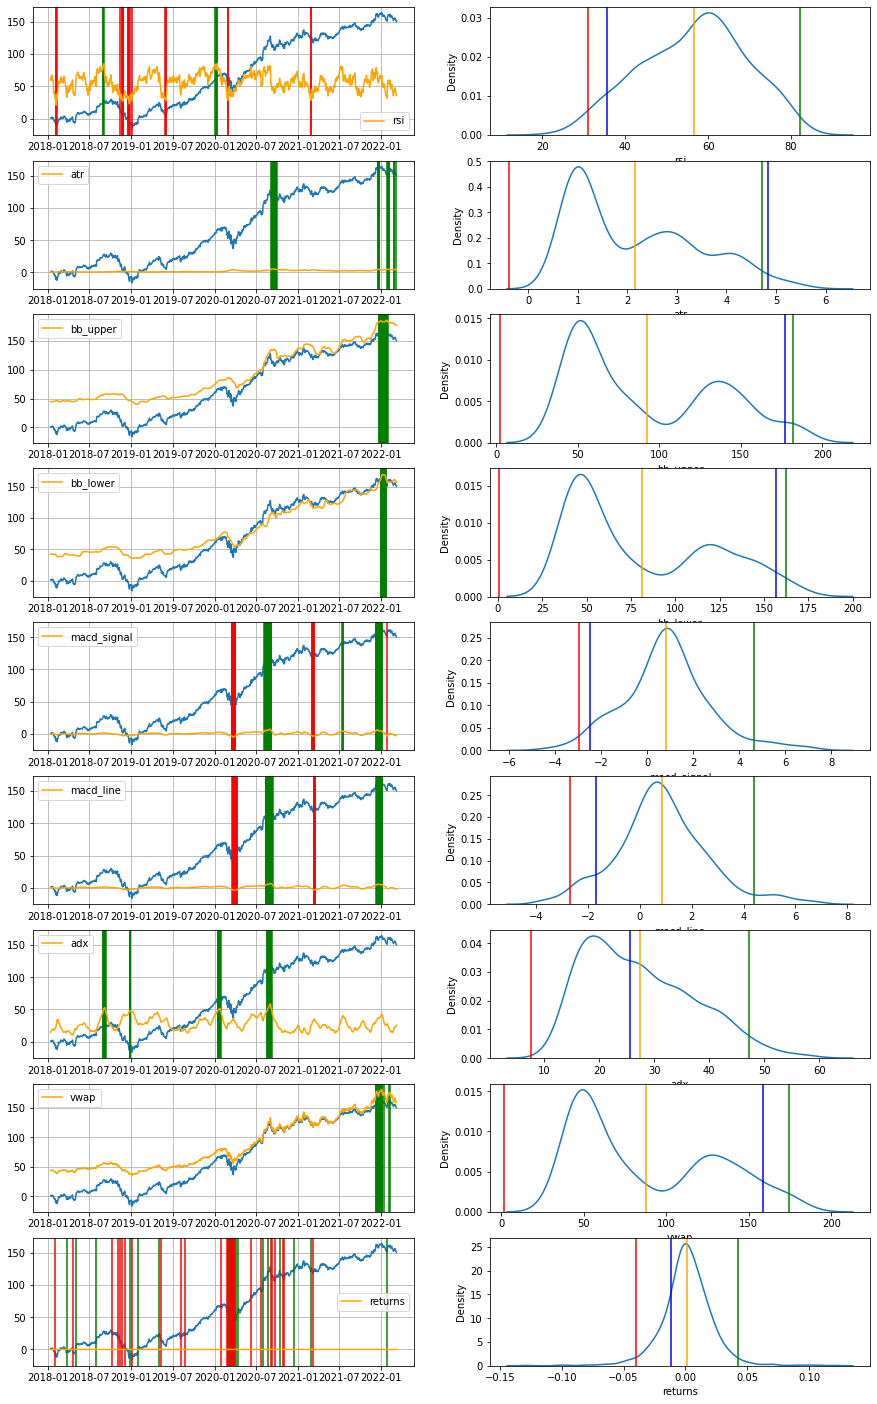

In [43]:
indicators_plot(cleaned_data, indicadores, figsize = (15,25) )





In [44]:
temp_cleaned_df_no_na = temp_cleaned_df.dropna()
temp_cleaned_df_no_na.shape
temp_cleaned_df_no_na.set_index("Date", inplace = True)
temp_cleaned_df_no_na



,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,ema55,...,bb_lower,macd_signal,macd_line,adx,vwap,returns,sharp_ratio,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,42.585971,...,42.376353,0.279048,0.208537,15.490660,44.174999,0.010326,0.06952,2,1,2018
2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,42.638169,...,42.398681,0.299277,0.226685,17.043627,44.310000,-0.005082,0.06952,3,1,2018
2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,42.714484,...,42.309309,0.369749,0.255298,17.874635,44.451668,0.016516,0.06952,3,1,2018
2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,42.789503,...,42.237196,0.423939,0.289026,18.904211,44.800833,0.000893,0.06952,3,1,2018
2018-01-19,44.652500,44.895000,44.352501,44.615002,129700400,44.052036,43.741365,43.606425,43.399591,42.854699,...,42.203431,0.445611,0.320343,19.377141,44.620834,-0.004463,0.06952,3,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800,166.182844,167.436760,167.855506,168.176060,167.568195,...,159.932806,-1.672662,-1.201970,22.659371,165.623332,0.020588,0.06952,9,3,2022
2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400,166.190098,167.327054,167.735098,168.064856,167.520403,...,159.921415,-1.544999,-1.270576,22.629427,166.896667,-0.001981,0.06952,9,3,2022
2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200,165.725467,166.949140,167.396942,167.785150,167.365031,...,159.359753,-1.671475,-1.350756,23.208600,163.606669,-0.018408,0.06952,9,3,2022


In [45]:
vif_df



,features,vif_index
28,sortino_week,inf
25,mean_week,inf
24,sortino_month,inf
21,mean_month,inf
20,sortino_anual,inf
17,man_annual,inf
13,sharp_ratio,1.383940e+08
1,hma55,1.656305e+04
6,bb_upper,8.083720e+03
7,bb_lower,6.420720e+03


In [46]:
merged_df



,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,sharp_ratio_annual,sortino_anual,mean_month,std_month,sharp_ratio_month,sortino_month,mean_week,std_week,sharp_ratio_week,sortino_week
0,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
1,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
3,2018-01-19,44.652500,44.895000,44.352501,44.615002,129700400,44.052036,43.741365,43.606425,43.399591,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
4,2018-01-22,44.325001,44.445000,44.150002,44.250000,108434400,44.082492,43.787605,43.654097,43.448186,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,-0.007879,0.009143,-0.861773,-1.106759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800,166.182844,167.436760,167.855506,168.176060,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
1026,2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400,166.190098,167.327054,167.735098,168.064856,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
1027,2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200,165.725467,166.949140,167.396942,167.785150,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
1028,2022-03-07,163.360001,165.020004,159.039993,159.300003,96213500,164.736934,166.253764,166.797169,167.300284,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.017697,0.008515,-2.078407,-2.485732


In [47]:
temp_merged_df_no_na = merged_df.dropna()

temp_merged_df_no_na.shape

temp_merged_df_no_na.set_index("Date", inplace = True)

temp_merged_df_no_na


,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,ema55,...,sharp_ratio_annual,sortino_anual,mean_month,std_month,sharp_ratio_month,sortino_month,mean_week,std_week,sharp_ratio_week,sortino_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,42.638169,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,42.714484,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,42.789503,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2018-01-19,44.652500,44.895000,44.352501,44.615002,129700400,44.052036,43.741365,43.606425,43.399591,42.854699,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,0.001966,0.010064,0.195363,0.276174
2018-01-22,44.325001,44.445000,44.150002,44.250000,108434400,44.082492,43.787605,43.654097,43.448186,42.904531,...,-0.014500,-0.167788,-0.003465,0.010745,-0.322466,-1.299158,-0.007879,0.009143,-0.861773,-1.106759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800,166.182844,167.436760,167.855506,168.176060,167.568195,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400,166.190098,167.327054,167.735098,168.064856,167.520403,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340
2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200,165.725467,166.949140,167.396942,167.785150,167.365031,...,-0.136766,-1.582002,-0.007804,0.015718,-0.496478,-2.926011,-0.002857,0.017022,-0.167861,-0.401340


sortino_week
mean_week
sortino_month
mean_month
sortino_anual
man_annual
sharp_ratio
hma55
bb_upper
bb_lower
hma34
vwap


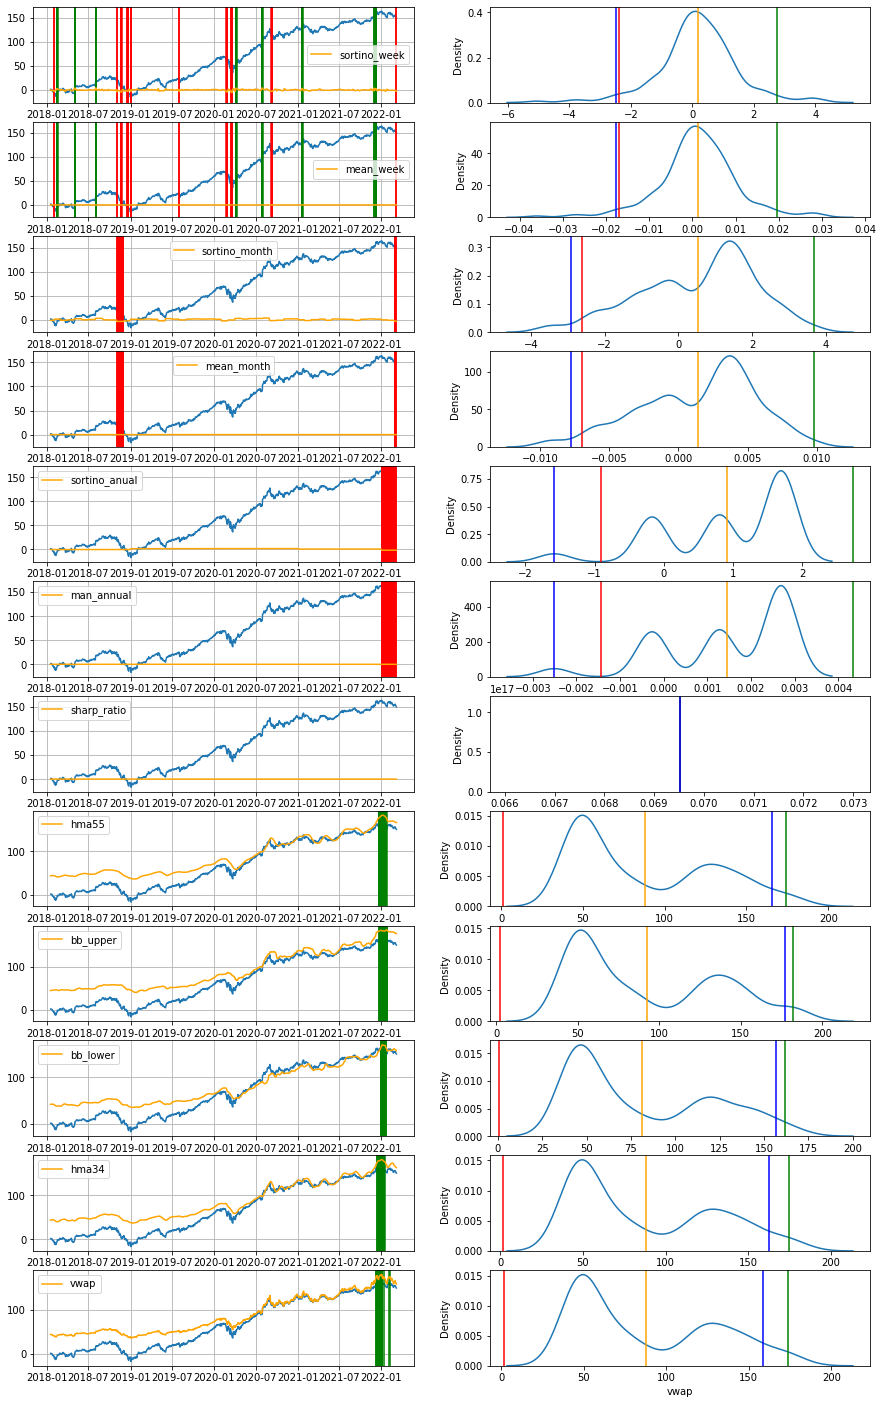

In [48]:
indicators_plot(merged_df.set_index("Date"), vif_df.features.head(12), figsize = (15,25) )


In [49]:
vif_df





,features,vif_index
28,sortino_week,inf
25,mean_week,inf
24,sortino_month,inf
21,mean_month,inf
20,sortino_anual,inf
17,man_annual,inf
13,sharp_ratio,1.383940e+08
1,hma55,1.656305e+04
6,bb_upper,8.083720e+03
7,bb_lower,6.420720e+03


macd_signal
year
month
week
atr
sharp_ratio_month
rsi
std_month
std_week
adx
returns
sharp_ratio_week


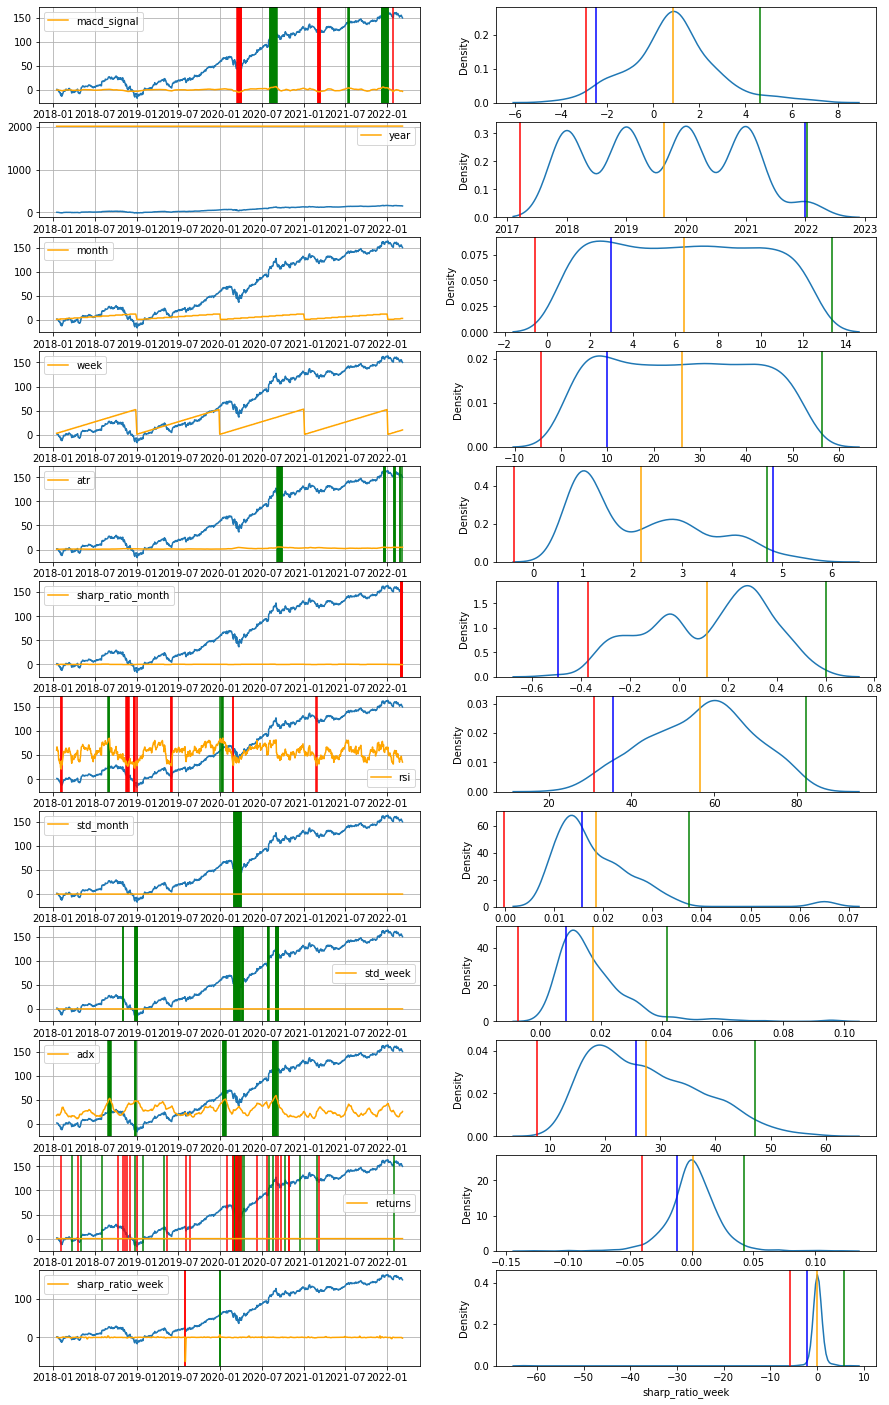

In [50]:
indicators_plot(merged_df.set_index("Date"), vif_df.features.tail(12), figsize = (15,25) )



# Testing Strategys


In [84]:
def return_strategy(x, df):
    
    last_order = x['order'][-3:]
    previus_info = df.loc[:x['Date']]['returns']
#     print(x['Date'])

#     print(previus_info.shape)
    
    
    mean = previus_info.mean()
    std = previus_info.std()
    
    two_above_std = mean + 2 * std
    two_below_std =  mean - 2 * std
    
    if x['returns'] <= two_below_std :
        order = 'buy'
    elif x['returns'] >= two_above_std: 
        order = 'sel'
    else:
        order = 'do nothing'

    return order


    
    
    
    
    
    

In [52]:
cleaned_data['order'] = 'out'

In [53]:
temp_cleaned = cleaned_data.reset_index()

temp_cleaned


,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,macd_signal,macd_line,adx,vwap,returns,sharp_ratio,week,month,year,order
0,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,0.226262,0.190909,14.458721,43.771667,NaN,0.06952,2,1,2018,out
1,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,0.279048,0.208537,15.490660,44.174999,0.010326,0.06952,2,1,2018,out
2,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,0.299277,0.226685,17.043627,44.310000,-0.005082,0.06952,3,1,2018,out
3,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,0.369749,0.255298,17.874635,44.451668,0.016516,0.06952,3,1,2018,out
4,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,0.423939,0.289026,18.904211,44.800833,0.000893,0.06952,3,1,2018,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800,166.182844,167.436760,167.855506,168.176060,...,-1.672662,-1.201970,22.659371,165.623332,0.020588,0.06952,9,3,2022,out
1042,2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400,166.190098,167.327054,167.735098,168.064856,...,-1.544999,-1.270576,22.629427,166.896667,-0.001981,0.06952,9,3,2022,out
1043,2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200,165.725467,166.949140,167.396942,167.785150,...,-1.671475,-1.350756,23.208600,163.606669,-0.018408,0.06952,9,3,2022,out
1044,2022-03-07,163.360001,165.020004,159.039993,159.300003,96213500,164.736934,166.253764,166.797169,167.300284,...,-2.060234,-1.492652,24.214012,161.120000,-0.023718,0.06952,10,3,2022,out


In [85]:
temp_cleaned['stategy'] =  temp_cleaned[['Date','order', 'returns']].apply(lambda x: return_strategy(x, cleaned_data) , axis = 1)









In [55]:
temp_cleaned.loc[:'2018-01-19']



,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,macd_line,adx,vwap,returns,sharp_ratio,week,month,year,order,stategy
0,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,0.190909,14.458721,43.771667,NaN,0.06952,2,1,2018,out,do nothing
1,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,0.208537,15.490660,44.174999,0.010326,0.06952,2,1,2018,out,do nothing
2,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,0.226685,17.043627,44.310000,-0.005082,0.06952,3,1,2018,out,do nothing
3,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,0.255298,17.874635,44.451668,0.016516,0.06952,3,1,2018,out,do nothing
4,2018-01-18,44.842499,45.025002,44.562500,44.814999,124773600,43.949678,43.654001,43.525739,43.325930,...,0.289026,18.904211,44.800833,0.000893,0.06952,3,1,2018,out,do nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2018-10-23,53.957500,55.812500,53.674999,55.682499,155071200,55.225710,55.303044,55.253688,55.061855,...,0.080448,17.873496,55.056666,0.009427,0.06952,43,10,2018,out,do nothing
198,2018-10-24,55.650002,56.057499,53.634998,53.772499,163702000,55.002139,55.163903,55.143970,54.988178,...,0.035992,17.851074,54.488332,-0.034302,0.06952,43,10,2018,out,sel
199,2018-10-25,54.427502,55.345001,54.187500,54.950001,119423200,54.994118,55.144458,55.129602,54.985996,...,0.001697,17.830252,54.827501,0.021898,0.06952,43,10,2018,out,do nothing
200,2018-10-26,53.974998,55.047501,53.167500,54.075001,189033600,54.852715,55.047234,55.051483,54.933939,...,-0.038396,18.540812,54.096667,-0.015924,0.06952,43,10,2018,out,do nothing


In [56]:
temp_cleaned['stategy'].value_counts()

do nothing    989
sel            29
buy            28
Name: stategy, dtype: int64

In [99]:
baseline_buyhold = cleaned_data.iloc[-1]['Close']  - cleaned_data.iloc[0]['Close']

baseline_buyhold


113.62000274658203

In [100]:
cleaned_data.iloc[-1]['Close']  , cleaned_data.iloc[0]['Close']


(157.44000244140625, 43.81999969482422)

In [86]:
profit = 0


In [152]:
numpy_array = temp_cleaned[~(temp_cleaned['stategy'] == 'do nothing')][['stategy', 'Close', 'Date']].to_numpy()
profit = 0
buy_price = 0
last_type_order = None
holding_days = 0

for index, values in enumerate(numpy_array):
    
    #Se a ordem atual for comprar a passada for diferente de comprar comprar
#     import ipdb; ipdb.set_trace()

    
    
    
    if (values[0] == 'buy') and (last_type_order != 'buy') :
        
        
        buy_price = values[1]
        print(f'Buying at price: {buy_price} at day {values[2]}' )
        last_type_order = 'buy'
        last_buy_day = values[2]
    #Se a order for vender a passada for diferente de vender vender
    elif (values[0] == 'sel') and (last_type_order == 'buy') and (buy_price < values[1]) and (buy_price > 0):
        
        
        sell_price = values[1]
        print(f'Sell at price: {sell_price} at day {values[2]}')

        last_sell_date = values[2]
#         import ipdb; ipdb.set_trace()
        profit += sell_price - buy_price 
        holding_days += (last_sell_date - last_buy_day).days
        
        
        
        
        last_type_order = 'sel'
    


Buying at price: 43.55500030517578 at day 2018-01-24 00:00:00
Sell at price: 52.26750183105469 at day 2018-08-06 00:00:00
Buying at price: 46.70000076293945 at day 2018-11-14 00:00:00
Sell at price: 75.0875015258789 at day 2020-01-02 00:00:00
Buying at price: 68.37999725341797 at day 2020-02-27 00:00:00


In [154]:
profit + (cleaned_data.iloc[-1]['Close'] - buy_price)


126.16000747680664

In [183]:
126.16000747680664 / 608

0.20750001229737935

In [153]:
holding_days


608

In [182]:
608 / 365 





1.6657534246575343

In [149]:
obj = (temp_cleaned[~(temp_cleaned['stategy'] == 'do nothing')][['stategy', 'Close', 'Date']]['Date'][8] - temp_cleaned[~(temp_cleaned['stategy'] == 'do nothing')][['stategy', 'Close', 'Date']]['Date'][786])


In [151]:
obj.days



-1129

In [133]:
temp_cleaned[~(temp_cleaned['stategy'] == 'do nothing')][['stategy', 'Close', 'Date']]

,stategy,Close,Date
8,buy,43.555000,2018-01-24
9,buy,42.777500,2018-01-25
142,sel,52.267502,2018-08-06
151,sel,54.395000,2018-08-17
160,sel,56.257500,2018-08-30
161,sel,56.907501,2018-08-31
162,sel,57.090000,2018-09-04
213,buy,46.700001,2018-11-14
217,buy,44.244999,2018-11-20
218,buy,44.195000,2018-11-21


In [91]:
def mean_std_strategy(x, df, column):
    
    last_order = x['order'][-3:]
    previus_info = df.loc[:x['Date']][column]
#     print(x['Date'])

#     print(previus_info.shape)
    
    
    mean = previus_info.mean()
    std = previus_info.std()
    
    two_above_std = mean + 2 * std
    two_below_std =  mean - 2 * std
    
    if x[column] <= two_below_std :
        order = 'buy'
    elif x[column] >= two_above_std: 
        order = 'sel'
    else:
        order = 'do nothing'

    return order



In [92]:
column = 'rsi'
temp_cleaned['stategy'] =  temp_cleaned[['Date','order', column ]].apply(lambda x: mean_std_strategy(x, cleaned_data, column) , axis = 1)





In [93]:
temp_cleaned[~(temp_cleaned['stategy'] == 'do nothing')][['stategy', 'Close', 'Date']]



,stategy,Close,Date
8,buy,43.555000,2018-01-24
9,buy,42.777500,2018-01-25
142,sel,52.267502,2018-08-06
151,sel,54.395000,2018-08-17
160,sel,56.257500,2018-08-30
161,sel,56.907501,2018-08-31
162,sel,57.090000,2018-09-04
213,buy,46.700001,2018-11-14
217,buy,44.244999,2018-11-20
218,buy,44.195000,2018-11-21


In [106]:
numpy_array = temp_cleaned[~(temp_cleaned['stategy'] == 'do nothing')][['stategy', 'Close']].to_numpy()
profit = 0
buy_price = 0
sell_price = 1
for index, values in enumerate(numpy_array):
    
    #Se a ordem atual for comprar a passada for diferente de comprar comprar
#     import ipdb; ipdb.set_trace()
    
    if (values[0] == 'buy') and (numpy_array[index-1][0] != 'buy') :
        
        buy_price = values[1]
        print('Buying at price: ', buy_price)
    #Se a order for vender a passada for diferente de vender vender
    elif (values[0] == 'sel') and (numpy_array[index-1][0] != 'sel') and (buy_price != 0):
        
        
        sell_price = values[1]
        print('sell at price: ', sell_price)
        
#         import ipdb; ipdb.set_trace()
        profit += sell_price - buy_price
    
    
    
    

Buying at price:  46.70000076293945
sell at price:  75.0875015258789
Buying at price:  68.37999725341797


In [107]:
profit

28.387500762939453

In [ ]:
# https://www.youtube.com/watch?v=Yj0yEBxwLVw


In [ ]:
# https://www.youtube.com/watch?v=hh3BKTFE1dc

In [156]:
temp_cleaned.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ema12', 'ema21',
       'ema26', 'ema34', 'ema55', 'ema99', 'ema200', 'hma12', 'hma21', 'hma26',
       'hma34', 'hma55', 'hma99', 'hma200', 'rsi', 'atr', 'bb_upper',
       'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap', 'returns',
       'sharp_ratio', 'week', 'month', 'year', 'order', 'stategy'],
      dtype='object')

In [158]:
def indicators_plot(cleaned_data, indicators, figsize = (15,25) ):
    '''
        Function used to make historical analysis of the indicators of a given stock
        has the dependency on matplotlib and seaborn libraries
        
        cleaned_data needs to be a dataframe containing a datetime index
        
        Indicators needs to be a list like the one below
        indicators = ['Volume','rsi', 'atr', 'bb_upper',
        'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap']
    '''
    
    fig = plt.figure(figsize= figsize)
    count = 0
    for column in indicators:
        print(column)
        
        
        mean = cleaned_data[column].mean()
        
        std = cleaned_data[column].std()
        
        two_above_std = mean + 2 * std
        two_below_std =  mean - 2 * std
        
        count +=1
        #Indicator Graph
        axs = fig.add_subplot(len(indicators),2,count)
        
        axs.plot(cleaned_data['Close'])
        
        for element in cleaned_data[cleaned_data[column]> two_above_std].reset_index().to_numpy(): 


            axs.axvline(element[0], color = 'green')

        for element in cleaned_data[cleaned_data[column]< two_below_std].reset_index().to_numpy(): 


            axs.axvline(element[0], color = 'red')

        axs.plot(cleaned_data[column], color = 'orange', label = column)
        
        plt.grid()
        
        plt.legend()
        #Distribution of the indicator
        count +=1
        axs = fig.add_subplot(len(indicators),2,count)
        axs = sns.kdeplot(cleaned_data[column])
        axs.axvline(mean, color = 'orange')
        
        axs.axvline(two_below_std, color = 'red')
        axs.axvline(two_above_std, color = 'green')
        axs.axvline(cleaned_data.iloc[-1][column], color = 'blue')

rsi
macd_signal
macd_line
ema99


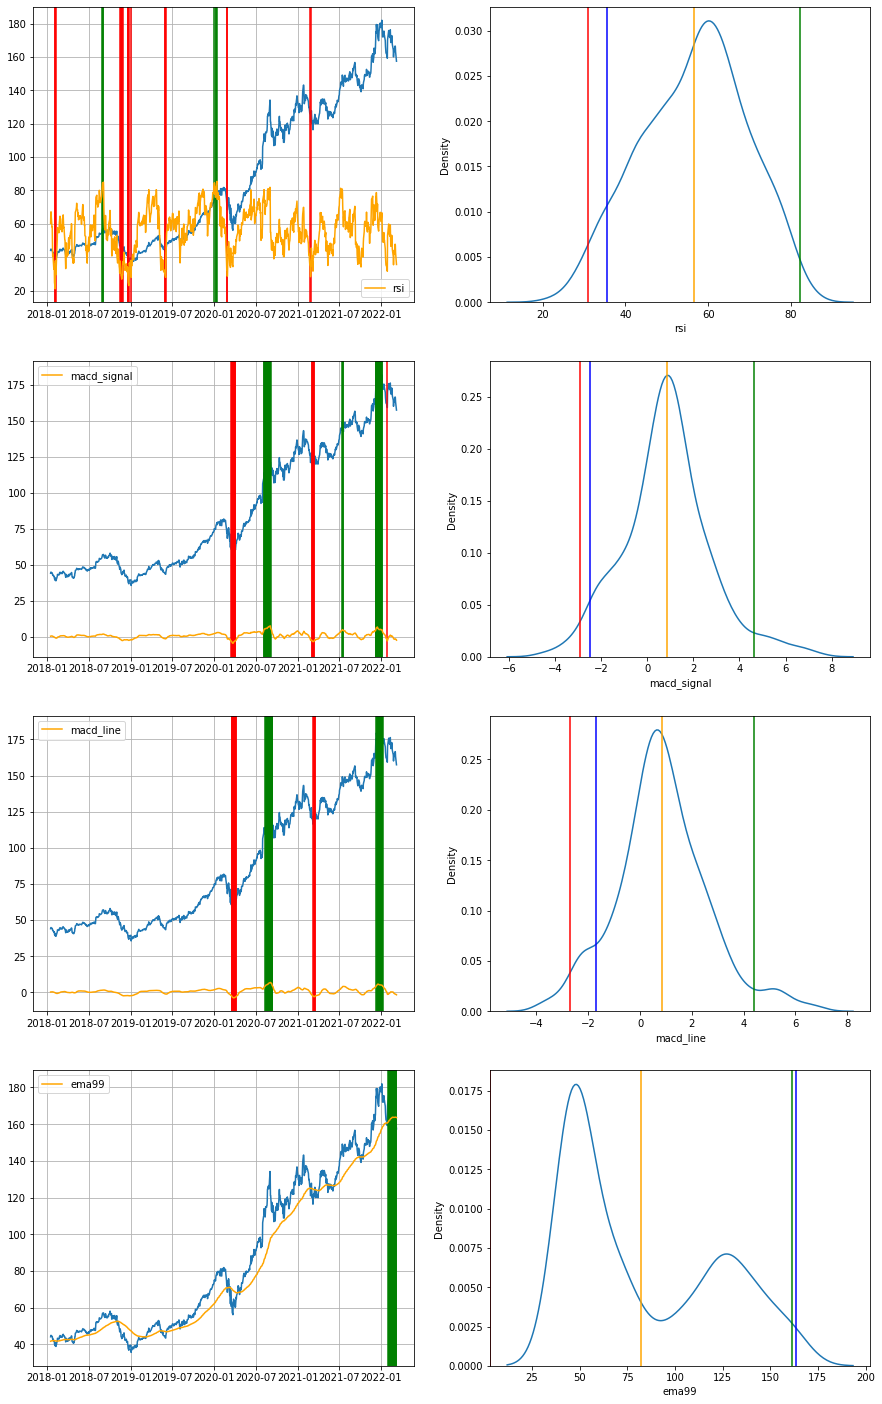

In [159]:
indicators_plot(merged_df.set_index("Date"),['rsi', 'macd_signal', 'macd_line', 'ema99'], figsize = (15,25) )



In [170]:
tmp_df = merged_df[['rsi', 'macd_signal', 'macd_line', 'ema99', "Close", "Date"]]





In [177]:
profit = 0
operation = 'out of position'
holding_days = 0
profits = []
for index, value in enumerate(tmp_df.to_numpy()):
    
#     print(index, value)
    if value[3] < value[4] and operation != 'buy' :
        
        buy_price = value[4]
        last_buy_day = value[-1]
        print(f"Buying at price {buy_price} {last_buy_day}")
        operation = 'buy'
    
    elif value[3] > value[4] and operation == 'buy':
        
        sell_price = value[4]
        operation = 'sell'
        last_sell_date = value[-1]
        print(f"Sell at price {sell_price} {last_sell_date}")
        
        
        holding_days += (last_sell_date - last_buy_day).days
        print(f'Holding days {holding_days}')
        
        
        profits.append(sell_price - buy_price)
#         profit += sell_price - buy_price
        
    
    
    
    
    
    
    

Buying at price 44.04750061035156 2018-01-16 00:00:00
Sell at price 41.74250030517578 2018-01-30 00:00:00
Holding days 14
Buying at price 41.842498779296875 2018-02-14 00:00:00
Sell at price 42.212501525878906 2018-03-22 00:00:00
Holding days 50
Buying at price 43.192501068115234 2018-03-26 00:00:00
Sell at price 42.084999084472656 2018-03-27 00:00:00
Holding days 51
Buying at price 42.90250015258789 2018-04-04 00:00:00
Sell at price 42.095001220703125 2018-04-06 00:00:00
Holding days 53
Buying at price 43.3125 2018-04-10 00:00:00
Sell at price 41.43000030517578 2018-04-20 00:00:00
Holding days 63
Buying at price 44.14250183105469 2018-05-02 00:00:00
Sell at price 51.869998931884766 2018-11-02 00:00:00
Holding days 247
Buying at price 52.48749923706055 2018-11-07 00:00:00
Sell at price 52.122501373291016 2018-11-08 00:00:00
Holding days 248
Buying at price 44.724998474121094 2019-03-11 00:00:00
Sell at price 46.43000030517578 2019-05-13 00:00:00
Holding days 311
Buying at price 47.7299

In [176]:
profit, holding_days

(59.730003356933594, 1200)

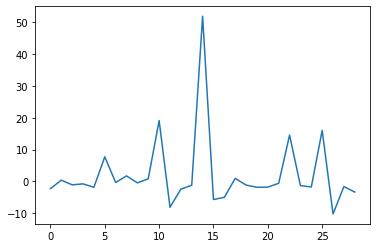

In [178]:
plt.plot(profits)